# Superstore Exploratory Data Analysis
## ***Practicum Assignment***


Over the course of the next **30 - 40 minutes**, you will apply the exploratory data analysis techniques from the previous session to a new dataset. We expect that you will produce and present a short analysis of the data to other members of the class. 

### Business Context
__Superstore__, a major North American office supply store, wants to apply analytics to its sales data to understand their current state, identify areas for efficiency gains, and boost profits. With Superstore's sales data in hand, can you help answer some of the following questions?
* How have Superstore's sales been over time? 
* Are there product groups which are over/under performing their peers? 
* Are complementry goods being effectively utilized?
* Do any adjustments to discount rates need to be made?
* Feel free to come up with your own questions

### Data Context

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.set(style="dark", context="notebook", 
        font_scale=1.5, rc={"lines.linewidth": 2.5})

In [50]:
df = pd.read_csv("../data/superstore.csv", encoding="latin1")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Section,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,1/3/2013,1/7/2013,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


In [51]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'Project',
       'Postal Code', 'Section', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Getting Started

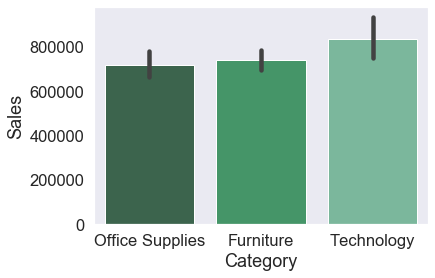

In [59]:
# create a barplot using seaborn
sns.barplot(df['Category'], df['Sales'], palette="BuGn_d", estimator=sum);

In [41]:
# Create a new dataframe, grouping by order ID
d2 = df.groupby('Order ID').apply(lambda x: [x for x in x['Product Name']])
d2.head(10)

Order ID
CA-2011-100006                                  [AT&T EL51110 DECT]
CA-2011-100090    [Hon 2111 Invitation Series Corner Table, Wils...
CA-2011-100293                                         [Xerox 1887]
CA-2011-100328    [Pressboard Covers with Storage Hooks, 9 1/2" ...
CA-2011-100363    [Binder Clips by OIC, Things To Do Today Spira...
CA-2011-100391                       [Strathmore Photo Frame Cards]
CA-2011-100678    [Prang Dustless Chalk Sticks, DMI Arturo Colle...
CA-2011-100706    [Case Logic 2.4GHz Wireless Keyboard, Ultra Do...
CA-2011-100762    [Hunt PowerHouse Electric Pencil Sharpener, Bl...
CA-2011-100860    [Smead Alpha-Z Color-Coded Name Labels First L...
dtype: object

In [60]:
# what is it?
type(d2)

pandas.core.series.Series

In [7]:
# Convert to a dataframe. Want the first column to be the index
d2 = pd.DataFrame(d2).reset_index()
d2.head()

,Order ID,0
0,CA-2011-100006,[AT&T EL51110 DECT]
1,CA-2011-100090,"[Hon 2111 Invitation Series Corner Table, Wils..."
2,CA-2011-100293,[Xerox 1887]
3,CA-2011-100328,"[Pressboard Covers with Storage Hooks, 9 1/2"" ..."
4,CA-2011-100363,"[Binder Clips by OIC, Things To Do Today Spira..."


In [8]:
# This is technically the new index
d2 = d2.rename(columns={0:'Items'})
d2.head()

,Order ID,Items
0,CA-2011-100006,[AT&T EL51110 DECT]
1,CA-2011-100090,"[Hon 2111 Invitation Series Corner Table, Wils..."
2,CA-2011-100293,[Xerox 1887]
3,CA-2011-100328,"[Pressboard Covers with Storage Hooks, 9 1/2"" ..."
4,CA-2011-100363,"[Binder Clips by OIC, Things To Do Today Spira..."


In [9]:
# Get total items for our new column
d2['Total Items'] = d2['Items'].apply(lambda x: len(x))
d2.head()

,Order ID,Items,Total Items
0,CA-2011-100006,[AT&T EL51110 DECT],1
1,CA-2011-100090,"[Hon 2111 Invitation Series Corner Table, Wils...",2
2,CA-2011-100293,[Xerox 1887],1
3,CA-2011-100328,"[Pressboard Covers with Storage Hooks, 9 1/2"" ...",1
4,CA-2011-100363,"[Binder Clips by OIC, Things To Do Today Spira...",2


In [10]:
# Want Order ID with more than one item
d3 = d2[d2['Total Items'] > 1]
d3.head()

,Order ID,Items,Total Items
1,CA-2011-100090,"[Hon 2111 Invitation Series Corner Table, Wils...",2
4,CA-2011-100363,"[Binder Clips by OIC, Things To Do Today Spira...",2
6,CA-2011-100678,"[Prang Dustless Chalk Sticks, DMI Arturo Colle...",4
7,CA-2011-100706,"[Case Logic 2.4GHz Wireless Keyboard, Ultra Do...",2
8,CA-2011-100762,"[Hunt PowerHouse Electric Pencil Sharpener, Bl...",4


In [11]:
from collections import Counter
# A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.
from itertools import combinations, groupby

def get_item_pairs(order):
    
    for items in order:
    
        # For each item list, generate item pairs, one at a time
        for item_pair in combinations(items, 2):
            yield item_pair                                   

In [12]:
c = Counter(get_item_pairs(d3['Items'].tolist()))

In [13]:
pairs = pd.DataFrame.from_dict(c, orient='index').reset_index()
pairs.head()

,index,0
0,"(Hon 2111 Invitation Series Corner Table, Wils...",1
1,"(Binder Clips by OIC, Things To Do Today Spira...",1
2,"(Prang Dustless Chalk Sticks, DMI Arturo Colle...",1
3,"(Prang Dustless Chalk Sticks, Cameo Buff Polic...",1
4,"(Prang Dustless Chalk Sticks, Kensington Exper...",1


In [14]:
pairs = pairs.rename(columns={'index':'pair', 0:'count'})
pairs.head()

,pair,count
0,"(Hon 2111 Invitation Series Corner Table, Wils...",1
1,"(Binder Clips by OIC, Things To Do Today Spira...",1
2,"(Prang Dustless Chalk Sticks, DMI Arturo Colle...",1
3,"(Prang Dustless Chalk Sticks, Cameo Buff Polic...",1
4,"(Prang Dustless Chalk Sticks, Kensington Exper...",1


In [15]:
pairs.sort_values(by='count', ascending=False).head()

,pair,count
1276,"(Staple envelope, Xerox 1971)",2
1218,"(Insertable Tab Post Binder Dividers, GBC Velo...",2
6835,(SAFCO Optional Arm Kit for Workspace Cribbage...,2
6232,"(Newell 344, Memorex Micro Travel Drive 16 GB)",2
4512,"(Acco Hanging Data Binders, Newell 315)",2


In [16]:
d2 = df.groupby('Order ID').apply(lambda x: [x for x in x['Sub-Category']])
d2 = pd.DataFrame(d2).reset_index()
d2 = d2.rename(columns={0:'Items'})
d2['Total Items'] = d2['Items'].apply(lambda x: len(x))
d3 = d2[d2['Total Items'] > 1]

In [17]:
d3.head()

,Order ID,Items,Total Items
1,CA-2011-100090,"[Tables, Binders]",2
4,CA-2011-100363,"[Fasteners, Paper]",2
6,CA-2011-100678,"[Art, Chairs, Envelopes, Accessories]",4
7,CA-2011-100706,"[Accessories, Furnishings]",2
8,CA-2011-100762,"[Art, Labels, Paper, Paper]",4


In [18]:
c2 = Counter(get_item_pairs(d3['Items'].tolist()))

In [19]:
p2 = pd.DataFrame.from_dict(c2, orient='index').reset_index()
p2.head()

,index,0
0,"(Tables, Binders)",44
1,"(Fasteners, Paper)",40
2,"(Art, Chairs)",52
3,"(Art, Envelopes)",18
4,"(Art, Accessories)",65


In [20]:
p2 = p2.rename(columns={'index':'pair', 0:'count'})
p2.sort_values(by='count', ascending=False)[:5]

,pair,count
61,"(Binders, Binders)",228
23,"(Paper, Binders)",211
12,"(Paper, Paper)",195
56,"(Binders, Paper)",188
21,"(Furnishings, Binders)",154


In [21]:
total = df.groupby(by='Sub-Category').sum().reset_index()
total.head()

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit
0,Accessories,44468434,167380.3180,2976,60.80,41936.6357
1,Appliances,25250538,107532.1610,1729,77.60,18138.0054
2,Art,43329658,27118.7920,3000,59.60,6527.7870
3,Binders,83626398,203412.7330,5974,567.00,30221.7633
4,Bookcases,12771539,114879.9963,868,48.14,-3472.5560


In [22]:
mean = df.groupby(by='Sub-Category').mean().reset_index()
mean.head()

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit
0,Accessories,57378.624516,215.974604,3.840000,0.078452,54.111788
1,Appliances,54185.703863,230.755710,3.710300,0.166524,38.922758
2,Art,54434.243719,34.068834,3.768844,0.074874,8.200737
3,Binders,54908.994091,133.560560,3.922521,0.372292,19.843574
4,Bookcases,56015.521930,503.859633,3.807018,0.211140,-15.230509


In [23]:
p2[['item1', 'item2']] = p2['pair'].apply(pd.Series)

In [24]:
p2 = p2.merge(total, how="left", left_on="item1", right_on="Sub-Category")

In [25]:
p2 = p2.merge(total, how="left", left_on="item2", right_on="Sub-Category", suffixes=("_item1", "_item2"))
p2.head()

,pair,count,item1,item2,Sub-Category_item1,Postal Code_item1,Sales_item1,Quantity_item1,Discount_item1,Profit_item1,Sub-Category_item2,Postal Code_item2,Sales_item2,Quantity_item2,Discount_item2,Profit_item2
0,"(Tables, Binders)",44,Tables,Binders,Tables,18607828,206965.532,1241,83.35,-17725.4811,Binders,83626398,203412.733,5974,567.0,30221.7633
1,"(Fasteners, Paper)",40,Fasteners,Paper,Fasteners,12506063,3024.280,914,17.80,949.5182,Paper,76299221,78479.206,5178,102.6,34053.5693
2,"(Art, Chairs)",52,Art,Chairs,Art,43329658,27118.792,3000,59.60,6527.7870,Chairs,34936229,328449.103,2356,105.0,26590.1663
3,"(Art, Envelopes)",18,Art,Envelopes,Art,43329658,27118.792,3000,59.60,6527.7870,Envelopes,13325731,16476.402,906,20.4,6964.1767
4,"(Art, Accessories)",65,Art,Accessories,Art,43329658,27118.792,3000,59.60,6527.7870,Accessories,44468434,167380.318,2976,60.8,41936.6357


In [26]:
p2['pairProfit'] = p2['Profit_item1'] + p2['Profit_item2']
p2['pairProfit'].head()

0    12496.2822
1    35003.0875
2    33117.9533
3    13491.9637
4    48464.4227
Name: pairProfit, dtype: float64

In [27]:
p2['pairSales'] = p2['Sales_item1'] + p2['Sales_item2']
p2['pairSales'].head()

0    410378.265
1     81503.486
2    355567.895
3     43595.194
4    194499.110
Name: pairSales, dtype: float64

In [28]:
p2 = p2.merge(mean, how="left", left_on="item1", right_on="Sub-Category")
p2 = p2.merge(mean, how="left", left_on="item2", right_on="Sub-Category", suffixes=("_mean_item1", "_mean_item2"))
p2.head()

,pair,count,item1,item2,Sub-Category_item1,Postal Code_item1,Sales_item1,Quantity_item1,Discount_item1,Profit_item1,...,Sales_mean_item1,Quantity_mean_item1,Discount_mean_item1,Profit_mean_item1,Sub-Category_mean_item2,Postal Code_mean_item2,Sales_mean_item2,Quantity_mean_item2,Discount_mean_item2,Profit_mean_item2
0,"(Tables, Binders)",44,Tables,Binders,Tables,18607828,206965.532,1241,83.35,-17725.4811,...,648.794771,3.890282,0.261285,-55.565771,Binders,54908.994091,133.560560,3.922521,0.372292,19.843574
1,"(Fasteners, Paper)",40,Fasteners,Paper,Fasteners,12506063,3024.280,914,17.80,949.5182,...,13.936774,4.211982,0.082028,4.375660,Paper,55692.862044,57.284092,3.779562,0.074891,24.856620
2,"(Art, Chairs)",52,Art,Chairs,Art,43329658,27118.792,3000,59.60,6527.7870,...,34.068834,3.768844,0.074874,8.200737,Chairs,56622.737439,532.332420,3.818476,0.170178,43.095894
3,"(Art, Envelopes)",18,Art,Envelopes,Art,43329658,27118.792,3000,59.60,6527.7870,...,34.068834,3.768844,0.074874,8.200737,Envelopes,52463.507874,64.867724,3.566929,0.080315,27.418019
4,"(Art, Accessories)",65,Art,Accessories,Art,43329658,27118.792,3000,59.60,6527.7870,...,34.068834,3.768844,0.074874,8.200737,Accessories,57378.624516,215.974604,3.840000,0.078452,54.111788


In [29]:
list(p2)

['pair',
 'count',
 'item1',
 'item2',
 'Sub-Category_item1',
 'Postal Code_item1',
 'Sales_item1',
 'Quantity_item1',
 'Discount_item1',
 'Profit_item1',
 'Sub-Category_item2',
 'Postal Code_item2',
 'Sales_item2',
 'Quantity_item2',
 'Discount_item2',
 'Profit_item2',
 'pairProfit',
 'pairSales',
 'Sub-Category_mean_item1',
 'Postal Code_mean_item1',
 'Sales_mean_item1',
 'Quantity_mean_item1',
 'Discount_mean_item1',
 'Profit_mean_item1',
 'Sub-Category_mean_item2',
 'Postal Code_mean_item2',
 'Sales_mean_item2',
 'Quantity_mean_item2',
 'Discount_mean_item2',
 'Profit_mean_item2']

In [30]:
p2 = p2.sort_values(by="pairProfit", ascending=False)
p2.head()

,pair,count,item1,item2,Sub-Category_item1,Postal Code_item1,Sales_item1,Quantity_item1,Discount_item1,Profit_item1,...,Sales_mean_item1,Quantity_mean_item1,Discount_mean_item1,Profit_mean_item1,Sub-Category_mean_item2,Postal Code_mean_item2,Sales_mean_item2,Quantity_mean_item2,Discount_mean_item2,Profit_mean_item2
254,"(Phones, Copiers)",3,Phones,Copiers,Phones,47897175,330007.054,3289,137.4,44515.7306,...,371.211534,3.699663,0.154556,50.073938,Copiers,56962.897059,2198.941618,3.441176,0.161765,817.909190
179,"(Copiers, Phones)",9,Copiers,Phones,Copiers,3873477,149528.030,234,11.0,55617.8249,...,2198.941618,3.441176,0.161765,817.909190,Phones,53877.587177,371.211534,3.699663,0.154556,50.073938
276,"(Accessories, Copiers)",3,Accessories,Copiers,Accessories,44468434,167380.318,2976,60.8,41936.6357,...,215.974604,3.840000,0.078452,54.111788,Copiers,56962.897059,2198.941618,3.441176,0.161765,817.909190
262,"(Copiers, Accessories)",3,Copiers,Accessories,Copiers,3873477,149528.030,234,11.0,55617.8249,...,2198.941618,3.441176,0.161765,817.909190,Accessories,57378.624516,215.974604,3.840000,0.078452,54.111788
222,"(Copiers, Paper)",21,Copiers,Paper,Copiers,3873477,149528.030,234,11.0,55617.8249,...,2198.941618,3.441176,0.161765,817.909190,Paper,55692.862044,57.284092,3.779562,0.074891,24.856620


In [31]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.graph_objs as go

init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x = p2['pairSales'],
    y = p2['pairProfit'],
    mode='markers',
    marker=dict(
        color = p2['Discount_mean_item1']
    )
)

data = [trace0]
iplot(data, filename='bubblechart-color')

In [32]:
trace0 = go.Scatter(
    x = p2['pairSales'],
    y = p2['Discount_mean_item1'],
    mode='markers'
)

data = [trace0]
iplot(data, filename='bubblechart-color')